# Análisis Exploratorio de Datos (EDA)

En este notebook, realizaremos un Análisis Exploratorio de Datos (EDA) utilizando un conjunto de datos sobre inmuebles en Barcelona. El objetivo de esta análisis es obtener una comprensión general de los datos, identificar patrones y relaciones significativas, y preparar el terreno para futuros análisis más profundos.

**Pasos del Análisis:**

1. **Entendimiento Inicial de los Datos:**
   - Cargar el conjunto de datos y examinar las primeras filas para obtener una visión general de las variables y su estructura.
   - Obtener información general y estadísticas descriptivas para entender mejor el contenido y la distribución de los datos.

2. **Distribución de los Precios:**
   - Examinar la distribución de los precios de los inmuebles para identificar patrones y posibles anomalías.

3. **Relación entre Precio y Otras Variables:**
   - Analizar cómo variables como el número de habitaciones, el área, el tipo de inmueble y el distrito influyen en el precio de los inmuebles.

4. **Correlación entre Variables:**
   - Evaluar la relación entre variables numéricas para entender cómo están interconectadas.

A lo largo del análisis, se utilizarán gráficos y estadísticas para visualizar y comprender los datos de manera efectiva.


In [15]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('Barcelona_Idealista.csv')

In [3]:
df.head()

,Unnamed: 0,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3265 non-null   int64 
 1   city          3265 non-null   object
 2   district      3265 non-null   object
 3   neighborhood  3265 non-null   object
 4   condition     3265 non-null   object
 5   type          3265 non-null   object
 6   rooms         3265 non-null   int64 
 7   area_m2       3265 non-null   int64 
 8   lift          3265 non-null   object
 9   views         3265 non-null   object
 10  floor         3265 non-null   object
 11  prices        3265 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 306.2+ KB


In [5]:
df.describe(include='all')

,Unnamed: 0,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
count,3265.000000,3265,3265,3265,3265,3265,3265.000000,3265.000000,3265,3265,3265,3.265000e+03
unique,NaN,1,10,65,3,8,NaN,NaN,2,2,20,NaN
top,NaN,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,NaN,NaN,Yes,exterior,floor 1,NaN
freq,NaN,3265,788,241,1355,2751,NaN,NaN,2727,3098,681,NaN
mean,1632.000000,NaN,NaN,NaN,NaN,NaN,3.160796,121.566616,NaN,NaN,NaN,6.004200e+05
std,942.668641,NaN,NaN,NaN,NaN,NaN,1.325257,92.721515,NaN,NaN,NaN,6.522661e+05
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,NaN,NaN,NaN,4.900000e+04
25%,816.000000,NaN,NaN,NaN,NaN,NaN,2.000000,72.000000,NaN,NaN,NaN,2.799000e+05
50%,1632.000000,NaN,NaN,NaN,NaN,NaN,3.000000,93.000000,NaN,NaN,NaN,4.190000e+05
75%,2448.000000,NaN,NaN,NaN,NaN,NaN,4.000000,135.000000,NaN,NaN,NaN,6.550000e+05


## Relación Entre Precio y Otras Variables

#### Número de Habitaciones y Área:

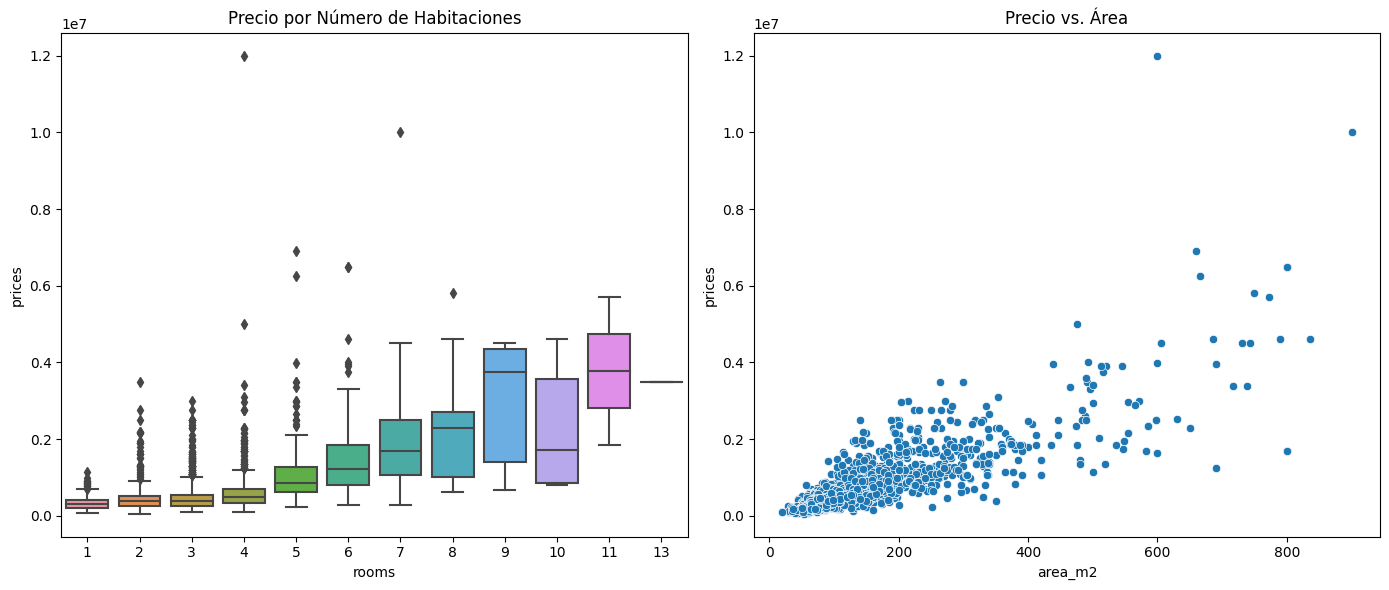

In [7]:
plt.figure(figsize=(14, 6))

# Precio vs. Número de Habitaciones
plt.subplot(1, 2, 1)
sns.boxplot(x='rooms', y='prices', data=df)
plt.title('Precio por Número de Habitaciones')

# Precio vs. Área
plt.subplot(1, 2, 2)
sns.scatterplot(x='area_m2', y='prices', data=df)
plt.title('Precio vs. Área')

plt.tight_layout()
plt.show()


#### Tipo de Inmueble:

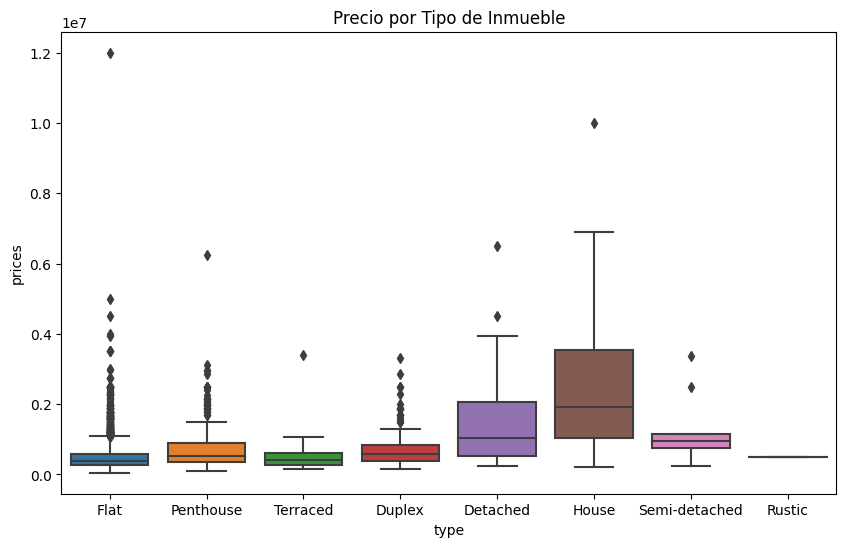

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='prices', data=df)
plt.title('Precio por Tipo de Inmueble')
plt.show()


#### Distrito:

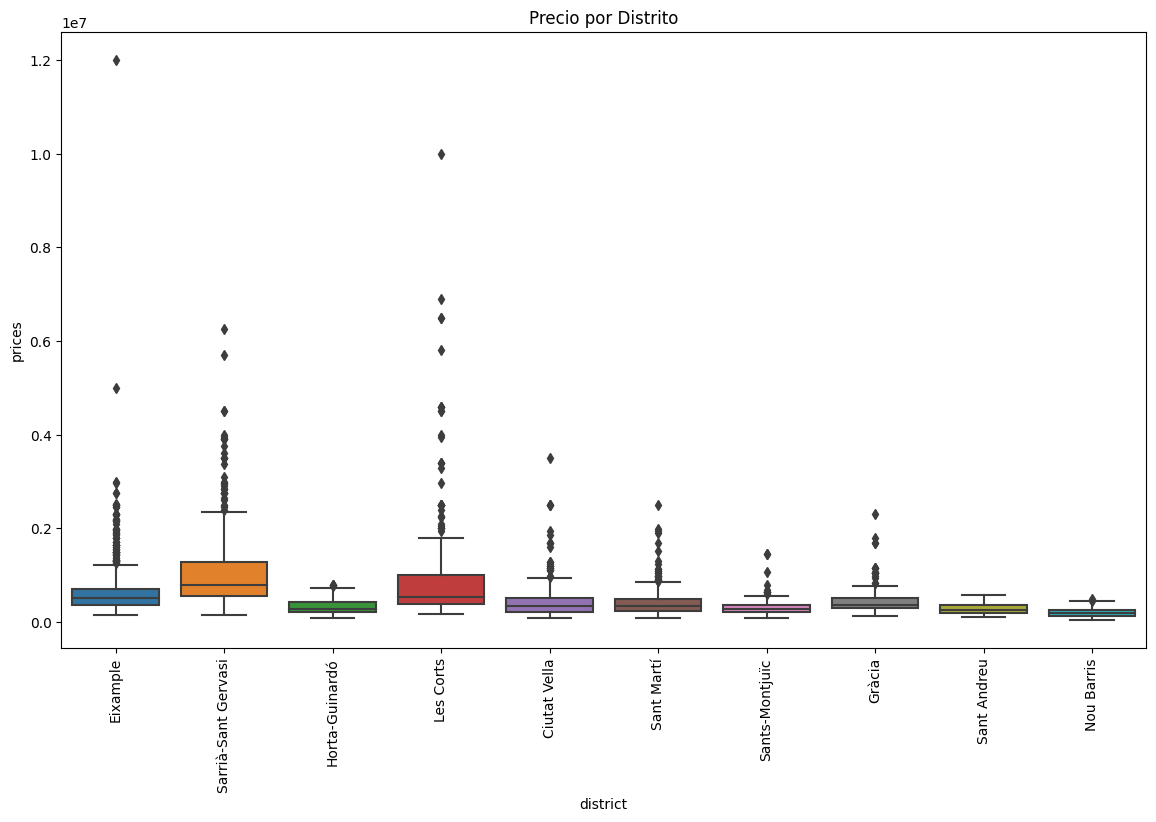

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='district', y='prices', data=df)
plt.title('Precio por Distrito')
plt.xticks(rotation=90)
plt.show()


## Correlación entre Variables

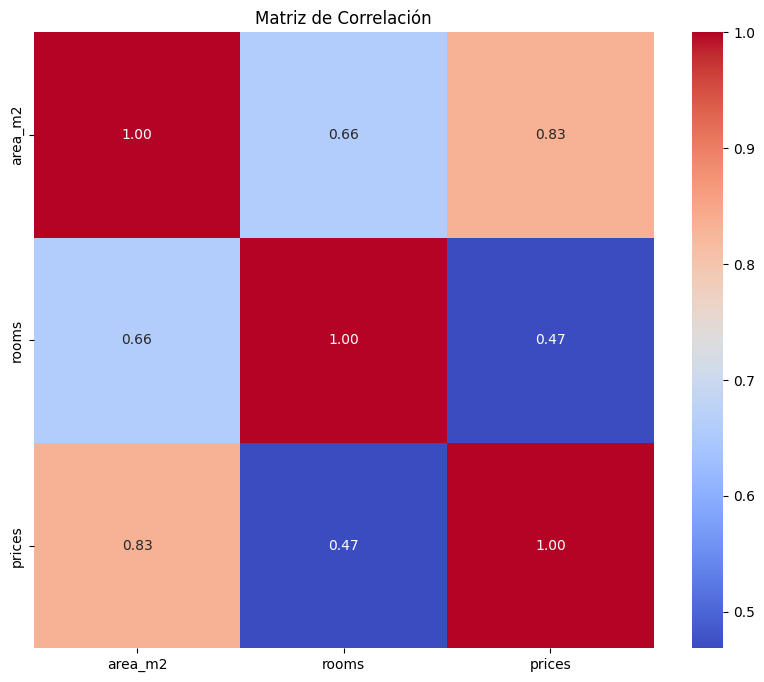

In [10]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[['area_m2', 'rooms', 'prices']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


## Machine Learning

#### Preparación de los Datos

In [14]:
# Codificar variables categóricas
df_encoded = pd.get_dummies(df, columns=['city', 'district', 'neighborhood', 'condition', 'type', 'lift', 'views', 'floor'], drop_first=True)

# Separar variables independientes (X) y la variable dependiente (y)
X = df_encoded.drop(columns=['prices', 'Unnamed: 0'])  # Eliminamos 'prices' porque es la variable que queremos predecir
y = df_encoded['prices']

# Agregar una constante para el término de intersección
X = sm.add_constant(X)

#### División en Conjuntos de Entrenamiento y Prueba

In [16]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Construcción del Modelo

In [17]:
# Crear el modelo de regresión lineal
modelo = sm.OLS(y_train, X_train).fit()

# Ver el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     81.71
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:57:10   Log-Likelihood:                -36761.
No. Observations:                2612   AIC:                         7.371e+04
Df Residuals:                    2517   BIC:                         7.427e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

#### Evaluación del Modelo

In [18]:
# Predecir precios en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el R2
from sklearn.metrics import mean_squared_error, r2_score

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

# Coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación R^2: {r2}')


Error Cuadrático Medio: 121572869648.4505
Coeficiente de Determinación R^2: 0.7728036470502005


#### Visualización de Resultados

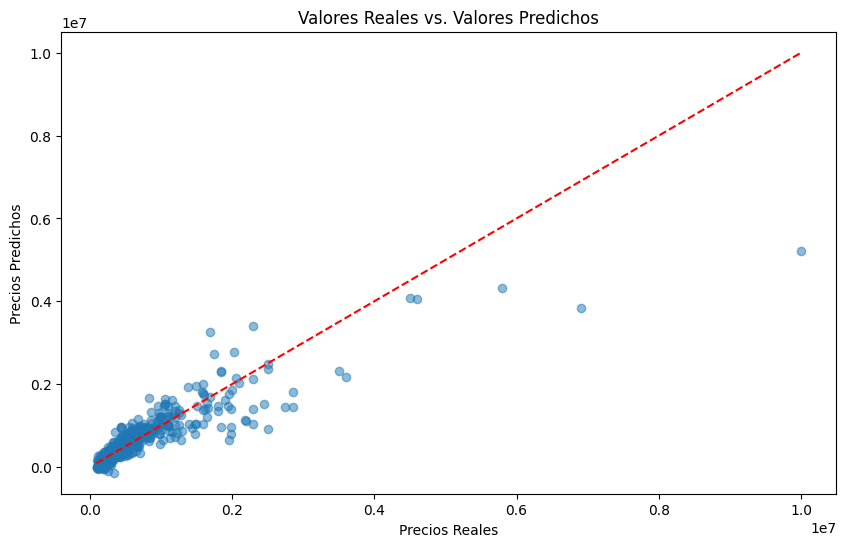

In [19]:
# Gráfico de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()


## Testando el Modelo con Valores Reales

#### Definir los Ejemplos

In [25]:
# Ejemplos de entrada
data_nueva = {
    'city': ['Barcelona', 'Barcelona', 'Barcelona', 'Barcelona', 'Barcelona'],
    'district': ['Eixample', 'Sarrià-Sant Gervasi', 'Eixample', 'Eixample', 'Horta-Guinardó'],
    'neighborhood': ['la Dreta de l\'Eixample', 'Sant Gervasi - Galvany', 'Sant Antoni', 'la Dreta de l\'Eixample', 'Can Baró'],
    'condition': ['good condition', 'good condition', 'good condition', 'good condition', 'good condition'],
    'type': ['Flat', 'Flat', 'Penthouse', 'Flat', 'Terraced'],
    'rooms': [3, 5, 2, 2, 3],
    'area_m2': [351, 298, 90, 130, 110],
    'lift': ['Yes', 'Yes', 'Yes', 'Yes', 'No'],
    'views': ['exterior', 'exterior', 'exterior', 'exterior', 'exterior'],
    'floor': ['floor 1', 'floor 3', 'floor 7', 'floor 1', 'Multiple']
}

# Crear un DataFrame con los ejemplos
df_nueva = pd.DataFrame(data_nueva)

# Codificar las variables categóricas de los nuevos ejemplos de la misma manera que hicimos con el DataFrame original
df_nueva_encoded = pd.get_dummies(df_nueva, columns=['city', 'district', 'neighborhood', 'condition', 'type', 'lift', 'views', 'floor'], drop_first=True)

# Asegurarnos de que el DataFrame codificado tenga las mismas columnas que el DataFrame de entrenamiento
df_nueva_encoded = df_nueva_encoded.reindex(columns=X.columns, fill_value=0)

#### Predicción con el Modelo

In [24]:
# Predecir precios con el modelo
precios_pred = modelo.predict(df_nueva_encoded)

# Mostrar las predicciones
df_nueva['predicted_prices'] = precios_pred
df_nueva['predicted_prices'] = df_nueva['predicted_prices'].round(2)

# Función para formatear números como moneda
def format_currency(value):
    return "${:,.2f}".format(value)

# Aplicar formato de moneda a los precios predichos
df_nueva['predicted_prices'] = df_nueva['predicted_prices'].apply(format_currency)
df_nueva

,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,predicted_prices
0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,"$2,093,359.10"
1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,"$1,660,905.58"
2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,"$452,968.25"
3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,"$884,143.98"
4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,"$333,445.34"


## Conclusión

En este análisis, hemos implementado un modelo de regresión lineal para predecir los precios de las viviendas en Barcelona utilizando un conjunto de datos con diversas características. A continuación, se detallan las razones para utilizar este modelo, sus ventajas, y la importancia del análisis realizado:

### **Razón para Utilizar el Modelo de Regresión Lineal**

La regresión lineal es una técnica fundamental en el análisis de datos y en la predicción de variables continuas. En este caso, el objetivo es predecir el precio de las viviendas basado en varias características, como el tipo de inmueble, el número de habitaciones, el área, entre otras. La regresión lineal es adecuada porque:

- **Relación Lineal**: El precio de las viviendas suele tener una relación lineal con varias de sus características. Por ejemplo, es razonable suponer que un aumento en el área de una vivienda tiende a aumentar su precio.
- **Interpretabilidad**: Los modelos de regresión lineal son fáciles de interpretar. Las magnitudes de los coeficientes indican cómo cada variable afecta al precio de la vivienda, facilitando la comprensión de los factores que influyen en el precio.

### **Ventajas del Modelo de Regresión Lineal**

1. **Simplicidad y Facilidad de Implementación**: La regresión lineal es relativamente sencilla de implementar y de comprender. Requiere menos recursos computacionales en comparación con modelos más complejos.
2. **Interpretación Clara**: Los coeficientes del modelo proporcionan una interpretación directa de cómo cada variable afecta al precio. Esto es útil para tomar decisiones basadas en la importancia de cada característica.
3. **Evaluación y Validación**: El modelo ha sido evaluado utilizando métricas estándar como el Error Cuadrático Medio (MSE), la Raíz del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R²). Estas métricas permiten medir la precisión del modelo y su capacidad para explicar la variabilidad en los precios.

### **Importancia del Análisis en este Jupyter Notebook**

1. **Comprensión de los Datos**: El análisis exploratorio de datos (EDA) realizado inicialmente proporciona una visión clara de la distribución de los precios y cómo están relacionados con las características de las viviendas. Esta comprensión es crucial para construir un modelo efectivo.
2. **Predicción de Precios**: Con el modelo de regresión lineal, podemos predecir los precios de nuevas viviendas basándonos en sus características. Esto es útil para compradores, vendedores y agentes inmobiliarios para valorar propiedades y tomar decisiones informadas.
3. **Evaluación del Modelo**: Las métricas de evaluación del modelo demuestran la capacidad del modelo para hacer predicciones precisas. Los resultados permiten ajustar el modelo y mejorarlo en futuras iteraciones.

En resumen, este análisis demuestra cómo un modelo de regresión lineal puede ser utilizado para predecir precios de viviendas de manera efectiva, proporcionando una herramienta valiosa para diversos actores en el mercado inmobiliario. La simplicidad y la interpretabilidad del modelo hacen que sea una opción atractiva para este tipo de análisis, mientras que las métricas de evaluación aseguran que el modelo es fiable y útil para la toma de decisiones.